# Data Science 1 - Signal analysis

## Lesson 4 - Discrete Fourier transform

&copy; 2021, dr.ir. Dave R.M. Langers (LADR, ZP11/H1.90, [d.r.m.langers@pl.hanze.nl](mailto:d.r.m.langers@pl.hanze.nl))

<img src="https://bioinf.nl/~davelangers/dave.png" width="10%" height="10%" alt="Dave Langers" /> 

<small>**Note:** step forward using `SPACE` or backward using `SHIFT`+`SPACE`, or use the arrows in the bottom right to navigate; run code cells using `CTRL`+`ENTER`.</small>

In [1]:
# Initialization

%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from IPython.display import display
from lesson4 import figure

### Main material

*Hands-on Signal Analysis with Python: An Introduction*, **chapter 8.4.5, 9.1, 9.3.1-2, 9.4**

<img src="https://images-na.ssl-images-amazon.com/images/I/41CaMa-FgDS._SX375_BO1,204,203,200_.jpg" width="5%" height="5%" alt="Hands-on Signal Analysis with Python: An Introduction" />

### <a id="/1">Lesson 4 - Discrete Fourier transform</a>

* <u>Part 3A</u><br />*Introduction*

* <span style="color:#336699"><a href="#/9">Part 3B</a><br />Trigonometric regression</span>

* <span style="color:#336699"><a href="#/13">Part 3C</a><br />Fourier series</span>

* <span style="color:#336699"><a href="#/17">Part 3D</a><br />Discrete cosine transform</span>

### Periodic signals

Signals that (more or less) repeat over regular intervals are called ([quasi](https://en.wikipedia.org/wiki/Quasiperiodicity)-)[periodic](https://en.wikipedia.org/wiki/Periodic_function).

An interval over which the signal repeats once is called a *cycle*. Its duration $T$ is called the *period*; the density of cycles per unit of time is called the signal *frequency* $f$.

$$
f = \frac{1}{T}
$$

![Wave period](https://cnx.org/resources/30a1b6835a157ca617082c7e97bda6132c4dcb26/per_sig.png)

In the the life sciences, (quasi-)periodic signals are quite common. E.g.:

* [Neural](https://en.wikipedia.org/wiki/Neural_oscillation) oscillations or brain waves

* [Glycolytic](https://en.wikipedia.org/wiki/Glycolytic_oscillation) oscillations

* [Cardiac](https://en.wikipedia.org/wiki/Cardiac_cycle) and [respiratory](https://en.wikipedia.org/wiki/Respiratory_rate) cycles

* [Cell](https://en.wikipedia.org/wiki/Cell_cycle) cycles

* Diurnal [blood glucose](https://en.wikipedia.org/wiki/Blood_sugar_level) variations

* Sleep/wake cycles and other [circadian](https://en.wikipedia.org/wiki/Circadian_rhythm) rhythms

* [Menstrual](https://en.wikipedia.org/wiki/Menstrual_cycle) hormone cycles

* [Phenological](https://en.wikipedia.org/wiki/Phenology) processes across seasons

* [Population](https://en.wikipedia.org/wiki/Population_dynamics) dynamics

### Fourier analysis

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Fourier2.jpg/400px-Fourier2.jpg" width="5%" height="5%" alt="Joseph Fourier" />

Fourier showed that *any* signal $y(x)$ can generally be written as a [Fourier series](https://en.wikipedia.org/wiki/Fourier_series), that is a sum of sinusoids with different frequencies $f_i$:

$$
y(x) = \sum_i a_i \cdot \cos ( 2 \pi f_i \cdot x) + b_i \cdot \sin ( 2 \pi f_i \cdot x)
$$

In principle, this holds for continuous as well as discrete signals of either finite or infinite length. We will only concern ourselves with discrete signals of finite length.

Fourier also came up with a method to determine the values of the coefficients $a_i$ and $b_i$.

The slowest repeating signal that is still captured by the measurement interval of length $L$ goes through only one cycle. This has a period $T=L$.

The figure shows a sinusoidal signal of length $L=1.0$ that is regularly sampled $n=12$ times (excluding the right endpoint).

Its frequency equals $f=1.0$ and its amplitude equals $A=1.0$. It can be written as

$$
y(x) = \cos\left(2\pi x - \frac{\pi}{2}\right) = \sin(2\pi x)
$$

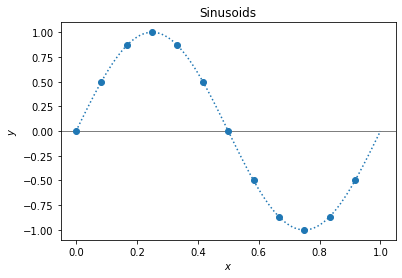

Figure 1: Sinusoids


In [2]:
figure(1)

The next slowest periodic signal that fits in the measurement interval has a period $T=\frac{L}{2}$.

The figure shows an additional sinusoidal signal with frequency $f=2$ and amplitude $A=\frac{1}{2}$.

Also, the sum of the two signals is shown in black. Although that is not sinusoidal, it is still periodic with period $T=1$.

$$
y(x) = \sin(2\pi x) + \frac{1}{2}\sin(4\pi x)
$$

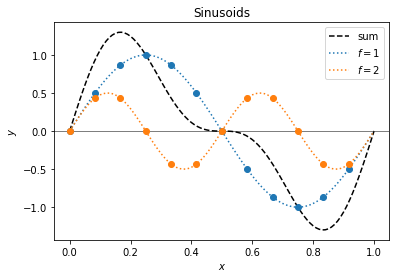

Figure 2: Sinusoids


In [3]:
figure(2)

Here, more sinusoids are added with amplitudes $A=\frac{1}{f}$. The sum retains a period $T=1$.

$$
\begin{aligned}
y(x) &= \sin(2\pi x) + \frac{1}{2}\sin(4\pi x) +
\\
&+ \frac{1}{3}\sin(6\pi x) + \frac{1}{4}\sin(8\pi x)
\end{aligned}
$$

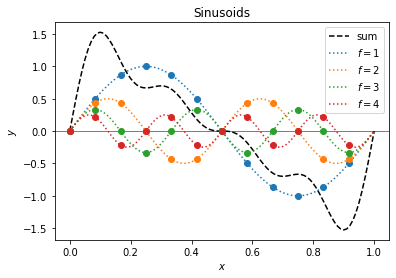

Figure 3: Sinusoids


In [4]:
figure(3)

As the number of sinusoidal components is increased, the sum approaches a [sawtooth](https://en.wikipedia.org/wiki/Sawtooth_wave) wave in this example. Here, 50 components are added together.

$$
y(x) = \sum_{f=1}^{50} \frac{1}{f}\sin(2\pi f\cdot x)
$$

Near $x=0$ and $x=1$, the sawtooth function jumps. The sum is unable to follow this accurately and shows ringing, called [Gibb's phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

<small>**Note:** this is comparable to [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) for polynomial interpolation, but decreases as the number of sinusoidal components is increased.</small>

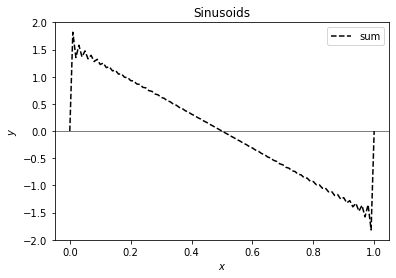

Figure 4: Sinusoids


In [5]:
figure(4)

### Amplitude spectrum

When added together, a cosine and sine wave of the same frequency combine into a *single* new sinusoid. The amplitude $A_i$ of this combined sinusoid equals

$$
A_i = \sqrt{a_i^2 + b_i^2}
$$

<small>**Note:** the [Pythagorean](https://en.wikipedia.org/wiki/Pythagorean_theorem) formula can be recognized here because the cosine and sine are so-called [orthogonal functions](https://en.wikipedia.org/wiki/Orthogonal_functions).</small>

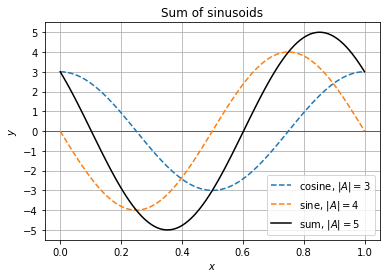

Figure 5: Sum of sinusoids


In [6]:
figure(5)

The values of the amplitudes $A_i$ are collectively known as the signal's [amplitude spectrum](https://en.wikipedia.org/wiki/Spectral_density). The spectrum shows which frequencies are dominant in a signal.

The below animation (from: [wikipedia](https://www.wikiwand.com/en/Fourier_series)) shows how an approximate [square wave](https://en.wikipedia.org/wiki/Square_wave) can be decomposed into sinusoidal frequency components to obtain its amplitude spectrum (here denoted $S(f)$).

![Fourier decomposition of a square wave](https://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif)

### Aliasing

Henceforth we will assume that the signal is sampled at *regular* intervals, i.e. they are *equidistant*.

* The *sampling period* $t_s$ denotes the equal spacing between successive samples.

* The *sampling frequency* $f_s$ equals the number of samples that is taken per unit of time.

These are related through

$$
f_s = \frac{1}{t_s}
$$

* The total length of the signal will be denoted as $L$.

* The number of samples equals $n$.

These are related through

$$
L = n \cdot t_s
$$

When a sinusoid is discretely sampled, a number of notable observations can be made.

**First**, at $f=0$, the cosine component represents a *constant* function. In other words, the term involving $a_0$ does not involve oscillations but represents a vertical shift or [bias](https://en.wikipedia.org/wiki/DC_bias).

**Second**, at $f=0$, the sine component represents a *zero* function. In other words, the term involving $b_0$ does not contribute.

**Third**, at $f=\frac{1}{2}f_s$, the sine component again represents a *zero* function. In other words, the term involving $b_{n/2}$ does not contribute either.

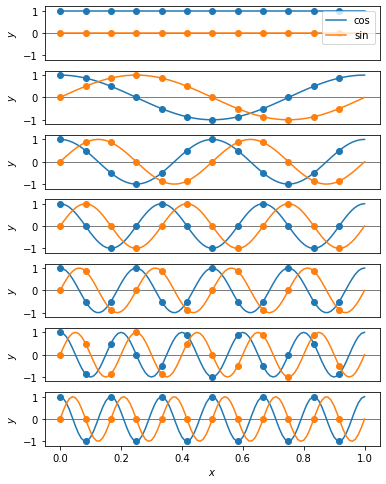

Figure 6: Components f=0 to f=6


In [7]:
figure(6)

**Fourth**, when the frequency $f$ of the cosine increases beyond half the sampling frequency, the apparent frequency of the sampled points *decreases* again.

**Fifth**, for the sine, the same happens, but the sign of the apparent slower oscillation is flipped. Phrased differently, its apparent phase is shifted by $\frac{\pi}{2}$.

The higher frequencies are said to be [aliased](https://en.wikipedia.org/wiki/Aliasing) to the lower frequency range.

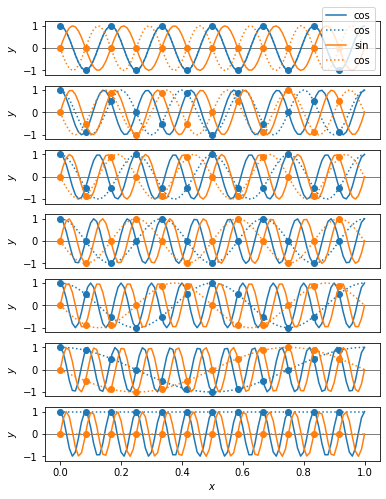

Figure 7: Components f=6 to f=12


In [8]:
figure(7)

The maximum frequency that can be faithfully represented by a discretely sampled signal is known as the [Nyquist frequency](https://en.wikipedia.org/wiki/Nyquist_frequency).

$$
f_\text{Ny} = \frac{1}{2}f_s = \frac{1}{2t_s} = \frac{n}{2L}
$$

Signal frequencies that are higher than $f_\text{Ny}$ appear as lower frequencies after sampling (potentially with a phase shift). 

When acquiring a signal, it is essential to employ a sampling frequency that is sufficiently high in order to be able to capture the frequencies of the signals of interest.

### Example

Consider the following data regarding the average temperature in the city of Groningen across all months in a year (from: [Climates to travel](https://www.climatestotravel.com/climate/netherlands/groningen)).

| Month     | T [°C] |   | Month     | T [°C] |
| --------- | ------ | - | --------- | ------ |
| January   |  2.5   |   | July      | 17.5   |
| February  |  2.9   |   | August    | 17.2   |
| March     |  5.5   |   | September | 14.2   |
| April     |  8.9   |   | October   | 10.2   |
| May       | 12.4   |   | November  |  6.1   |
| June      | 15.1   |   | December  |  3.3   |

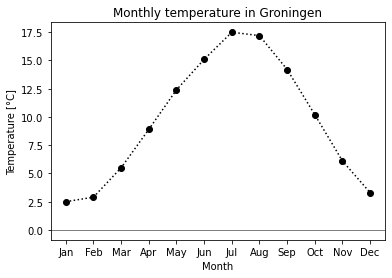

In [32]:
from calendar import month_abbr
months = [month_abbr[i + 1] for i in range(12)]
temps = np.array([2.5,  2.9,  5.5,  8.9,  12.4, 15.1,
                  17.5, 17.2, 14.2, 10.2, 6.1,  3.3])

plt.axhline(0.0, color='k', lw=0.5)
plt.plot(temps, 'o:k')
plt.xlabel('Month'); plt.ylabel('Temperature [°C]')
plt.title('Monthly temperature in Groningen')
plt.xticks(range(12), months)
plt.show()

The `fft` module in `numpy` provides the `rfft()` function that implements the ([real-valued](https://en.wikipedia.org/wiki/Real_number), [fast](https://en.wikipedia.org/wiki/Fast_Fourier_transform)) Fourier transform. Given a discrete regularly sampled signal $\boldsymbol{x}$, it determines the amplitudes of the cosine and sine components at all frequencies that are present in the signal.

In [33]:
help(np.fft.rfft)

Help on function rfft in module numpy.fft:

rfft(a, n=None, axis=-1, norm=None)
    Compute the one-dimensional discrete Fourier Transform for real input.
    
    This function computes the one-dimensional *n*-point discrete Fourier
    Transform (DFT) of a real-valued array by means of an efficient algorithm
    called the Fast Fourier Transform (FFT).
    
    Parameters
    ----------
    a : array_like
        Input array
    n : int, optional
        Number of points along transformation axis in the input to use.
        If `n` is smaller than the length of the input, the input is cropped.
        If it is larger, the input is padded with zeros. If `n` is not given,
        the length of the input along the axis specified by `axis` is used.
    axis : int, optional
        Axis over which to compute the FFT. If not given, the last axis is
        used.
    norm : {"backward", "ortho", "forward"}, optional
        .. versionadded:: 1.10.0
    
        Normalization mode (see `nump

The `rfft()` function returns the coefficients $a_i$ and $b_i$. However, it does so in the form of an array of [complex numbers](https://en.wikipedia.org/wiki/Complex_number) involving the [imaginary unit](https://en.wikipedia.org/wiki/Imaginary_unit) $j=\sqrt{-1}$.

In [4]:
coef = np.fft.rfft(temps, norm='forward')
coef.dtype

dtype('complex128')

In [5]:
coef

array([ 9.65000000e+00+0.j        , -3.75860525e+00+0.38570508j,
        8.75000000e-02-0.20928947j,  0.00000000e+00+0.1j       ,
        6.25000000e-02-0.03608439j,  8.60525323e-03+0.03929492j,
        5.00000000e-02+0.j        ])

<small>**Note:** we will *always* use forward normalisation by specifying `norm='forward'`; it is beyond our current scope to explain this further.</small>

For reasons that will become clearer later, all coefficients except those at the zero-frequency and at the Nyquist-frequency are a factor 2 too small.

* The zero frequency is always represented by the first element of the array.

* The Nyquist frequency coincides with the last element of the array if the number of samples $n$ is even; if $n$ is odd, then all frequencies lie below the Nyquist frequency.

In addition, for our purposes the sign of the imaginary part is wrong.

We can correct for these shortcomings by multiplying these values by 2 and taking the [complex conjugate](https://en.wikipedia.org/wiki/Complex_conjugate).

In [6]:
if temps.size % 2 == 0:
    print('The sample size N is even, thus the Nyquist frequency coincides with the last element of the array.')
else:
    print('The sample size N is odd, thus all frequencies lie below the Nyquist frequency.')

The sample size N is even, thus the Nyquist frequency coincides with the last element of the array.


In [7]:
# all coefficients except zero-frequency and the Nyquist-frequency are a factor 2 too small.
# also take complex conjugate.
coef[1:-1] = 2.0 * np.conj(coef[1:-1])
coef

array([ 9.65      +0.j        , -7.51721051-0.77141016j,
        0.175     +0.41857895j,  0.        -0.2j       ,
        0.125     +0.07216878j,  0.01721051-0.07858984j,
        0.05      +0.j        ])

Now, the coefficients $a_i$ and $b_i$ can be extracted from the *real* and *imaginary* parts of this array.

In [8]:
np.imag(coef)

array([ 0.        , -0.77141016,  0.41857895, -0.2       ,  0.07216878,
       -0.07858984,  0.        ])

In [9]:
a, b = np.real(coef), np.imag(coef)

Note that the coefficient $a_0$ of the constant function always equals the mean of the $y_i$.

In [10]:
a[0], np.mean(temps)

(9.649999999999999, 9.65)

Also note that the coefficient $b_0$ at the zero frequency and $b_{n/2}$ at the Nyquist frequency are arbitrarily set to zero, since those do not contribute because the sine function equals zero.

In [11]:
b[0], b[-1]

(0.0, 0.0)

The `np.fft` module provides a helper function `rfftfreq` that returns the frequencies $f_i$. It requires the number of samples $n$ and the sampling period $t_s$ to be specified.

Since our $x$ are expressed in months, we also specify the sampling period as 1.0 month.

<small>**Note:** the unit that the frequency is expressed in is the inverse of the unit that the sampling time is expressed in; for example, if the sampling time is expressed in seconds, then the frequencies are expressed in cycles per second (i.e. Hertz).</small>

In [12]:
f = np.fft.rfftfreq(len(temps), 1.0)
f

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       ])

On the right, the amplitude spectrum $A(f)$ is plotted. Perhaps unsurprisingly, the first two frequency components are dominant by far.

* The first component at $f=0$ models the constant bias, indicating that the average temperature in Groningen over an entire year is not zero.

* The second component at $f=1$ cycle per year models the seasonal variation in temperature, indicating that the temperature difference between summer and winter in Groningen is not zero.

The highest frequency $f_\text{Ny}=\frac{1}{2}$ cycles per month (i.e. 6 cycles per year) is the fastest oscillation that could theoretically be estimated from these data.

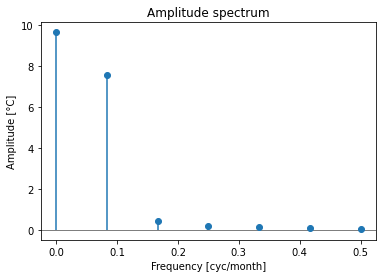

In [21]:
spectrum = np.sqrt(a * a + b * b)

plt.axhline(0.0, color='k', lw=0.5)
plt.stem(f, spectrum, basefmt='None')
plt.xlabel('Frequency [cyc/month]'); plt.ylabel('Amplitude [°C]')
plt.title('Amplitude spectrum')
plt.show()

The original signal can be reconstructed by multiplying the coefficients with their respective sinusoids and adding these together.

$$
y(x) = \sum_i a_i \cos ( 2\pi f_i x) + b_i \sin ( 2\pi f_i x)
$$

Because $y(x)$ *exactly* reconstructs the data points $(x_i, y_i)$, but also allows $y(x)$ to be calculated for intermediate $x$, this is a form of [trigonometric interpolation](https://en.wikipedia.org/wiki/Trigonometric_interpolation).

<small>**Note:** Although only one year is shown, the signal is assumed to be periodic and could therefore be extrapolated by repeating it on both sides.</small>

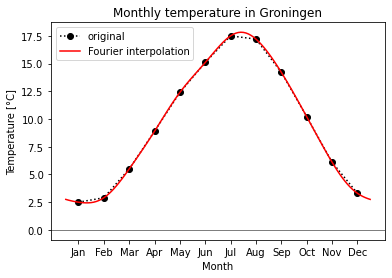

In [19]:
x = np.linspace(-0.5, 11.5, 121)
y = sum(
    ai * np.cos(2 * np.pi * fi * x) +
    bi * np.sin(2 * np.pi * fi * x)
    for ai, bi, fi in zip(a, b, f)
)

plt.axhline(0.0, color='k', lw=0.5)
plt.plot(temps, 'o:k', label='original')
plt.plot(x, y, '-r', label='Fourier interpolation')
plt.xlabel('Month'); plt.ylabel('Temperature [°C]')
plt.title('Monthly temperature in Groningen')
plt.legend(); plt.xticks(range(12), months)
plt.show()

### Other useful functions

The `scipy.fft` module contains similar `rfft()` and `rfftfreq()` functions. These operate identically to those from `numpy`, although they have a couple of additional options that we will not currently explore.

### Exercise 1

Generate your own artificial $\frac{1}{2}$-hour long 30-sample signal that is sampled once per minute, containing a single cosine with amplitude $A=1$ and frequencies of either

* $f=4$ cycles/hour

* $f=9$ cycles/hour

* $f=36$ cycles/hour

and plot their amplitude spectra.

Try to explain your observations.

**Note**

$L = 0.5$ total length of the signal is 0.5 hours.

$n = 30$ total number of samples.

$A = 1$ amplitude. 

$t_s = L/n = 0.5/30 = 0.016666 $ The sampling period, the equal spacing between successive examples.

$f_s = 1/t_s = 60 $ The sampling frequency, number of samples that is taken per unit of time.

Frequencies will be:

$f = 4$ cycles/hour

$f = 9$ cycles/hour 

$f = 36$ cycles/hour 

In [41]:
def generate_wave(freq, n_samples, duration, amplitude, kind, endpoint=False):
    options = ['sin', 'cos']
    if kind not in options:
        raise ValueError('Expects kind to be "cos" or "sin".')
        
    x = np.linspace(0, duration, n_samples, endpoint=endpoint)
    
    if kind == 'cos':
        y = amplitude * np.cos(2.0 * np.pi * freq * x)

    if kind == 'sin':
        y = amplitude * np.sin(2.0 * np.pi * freq * x)

    return x, y

In [50]:
def obtain_frequency_spectrum(y, sampling_period):
    coef = np.fft.rfft(y, norm='forward')
    
    if y.size % 2 == 0:
        coef[1:-1] = 2.0 * np.conj(coef[1:-1])
    else:
        coef[1:] = 2.0 * np.conj(coef[1:])
        
    a, b = np.real(coef), np.imag(coef)
    
    freq = np.fft.rfftfreq(y.size, sampling_period)
    
    spectrum = np.sqrt(a * a + b * b)
    
    return freq, spectrum

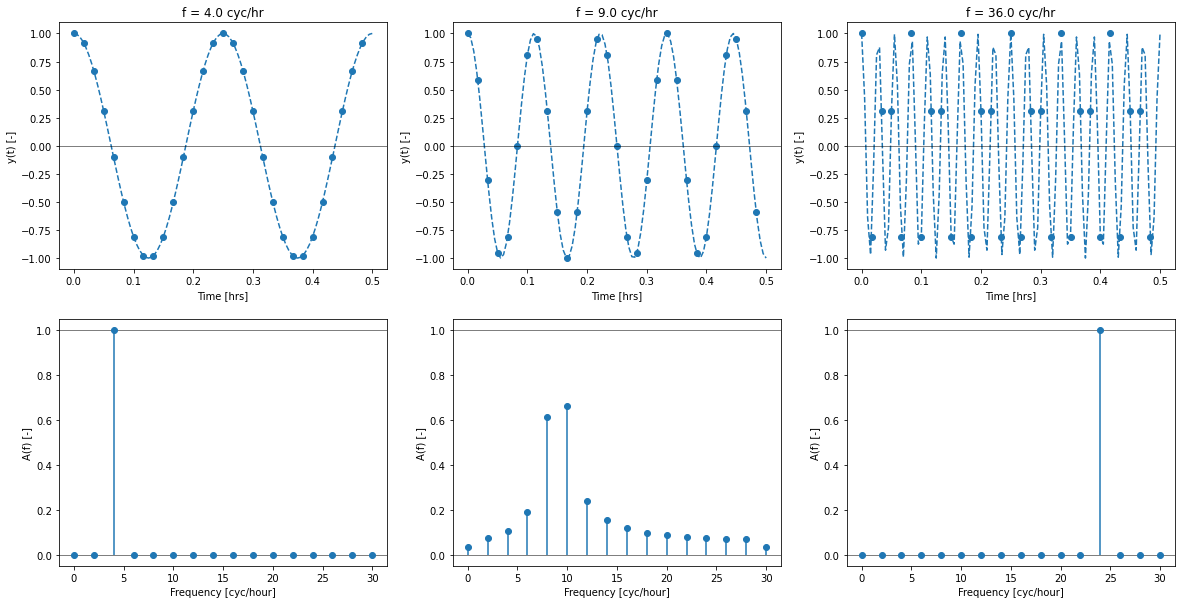

In [51]:
frequencies = [4.0, 9.0, 36.0]

L = 0.5
n = 30
A = 1
ts = L/n # sampling period
fs = 1/ts # sampling frequency

i, j = 0, 0

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for freq in frequencies:
    x, y = generate_wave(freq, n, L, A, 'cos')
    xi, yi = generate_wave(freq, 101, L, A, 'cos', endpoint=True)
    
    axs[i][j].plot(x, y, 'o', color='C0')
    axs[i][j].plot(xi, yi, '--', color='C0')
    
    axs[i][j].axhline(0.0, color='k', lw=0.5)
    axs[i][j].set_ylabel('y(t) [-]')
    axs[i][j].set_xlabel('Time [hrs]')
    axs[i][j].set_title('f = {} cyc/hr'.format(freq))
    
    i += 1
    
    freq, spect = obtain_frequency_spectrum(y, ts)
    
    axs[i][j].axhline(0.0, color='k', lw=0.5)
    axs[i][j].axhline(1.0, color='k', lw=0.5)
    axs[i][j].stem(freq, spect, basefmt='None')
    axs[i][j].set_ylabel('A(f) [-]')
    axs[i][j].set_xlabel('Frequency [cyc/hour]')
    
    
    j += 1
    i = 0

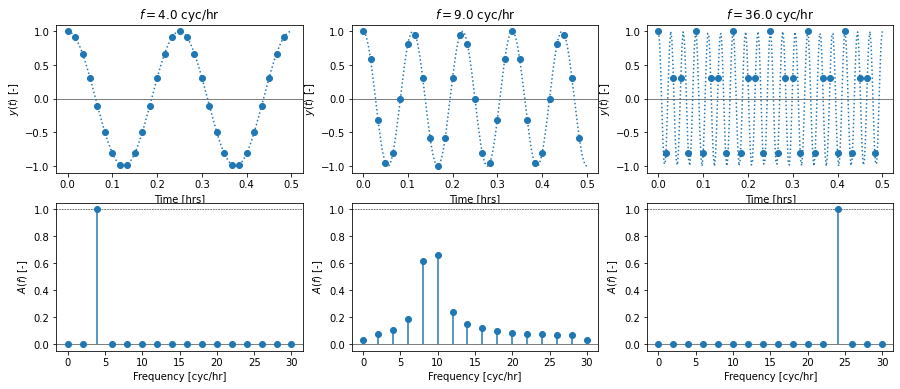

### Exercise 2

The following code loads the daily percentage sunshine that was measured across the last four years in Eelde (Groningen, NL).

```python
url = 'https://daggegevens.knmi.nl/klimatologie/daggegevens?' + \
      'start=20180101&end=20211231&stns[280]=1&vars[SP]=1'
sun = pd.read_csv(url, comment='#', usecols=[1, 2], names=['Day', 'Sunshine [%]'])
```

Determine the frequency in the spectrum that has the largest amplitude, apart from the component at $f=0$. What is the interpretation of this frequency component?

<small>**Note:** because the number of data points is odd instead of even, the spectrum runs up to *but does not include* the Nyquist frequency; this affects which elements need to be scaled by a factor of 2!</small>

In [15]:
url = 'https://daggegevens.knmi.nl/klimatologie/daggegevens?' + \
      'start=20180101&end=20211231&stns[280]=1&vars[SP]=1'
sun = pd.read_csv(url, comment='#', usecols=[1, 2], names=['Day', 'Sunshine [%]'])
sun['Day'] = pd.to_datetime(sun['Day'].astype('str'))

sun.head()

,Day,Sunshine [%]
0,2018-01-01,46
1,2018-01-02,33
2,2018-01-03,0
3,2018-01-04,0
4,2018-01-05,0


<AxesSubplot:xlabel='Day', ylabel='Sunshine [%]'>

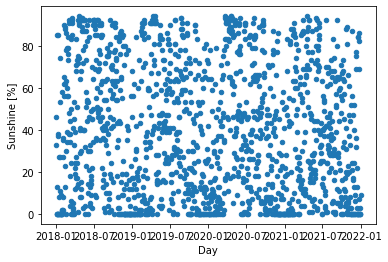

In [57]:
sun.plot(x='Day', y='Sunshine [%]', kind='scatter')

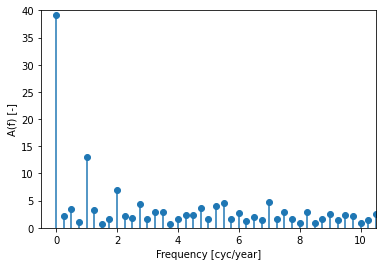

In [58]:
n = sun['Day'].size
L = 4 # duration is 4 years
ts = L / n # sampling period

freq, spect = obtain_frequency_spectrum(sun['Sunshine [%]'], ts)
plt.axhline(0.0, color='k', lw=0.5)
plt.stem(freq, spect, basefmt='None')
plt.xlim([-0.5, 10.5])
plt.ylim([0, 40])
plt.ylabel('A(f) [-]')
plt.xlabel('Frequency [cyc/year]')
plt.show()

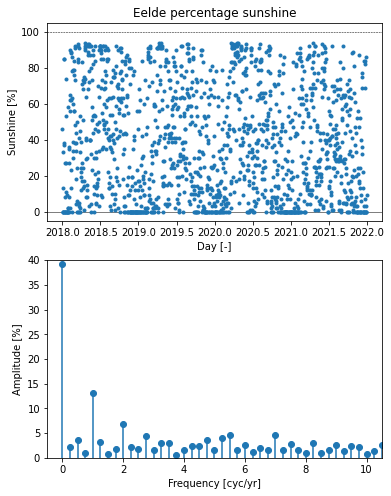

f_max (f>0) = 1.000 cyc/yr


### Exercise 3

The below code fragment loads the respiratory volume of a subject while standing breathing normally (first half minute) or breathing deeply (second half minute) according to a sensor placed around the thorax (from: [biosignalsplux](https://biosignalsplux.com/learn/samples.html)).

```python
url = 'http://biosignalsplux.com/downloads/samples/respiration-rip/SampleRIP_converted.txt'
respiration = pd.read_csv(url, sep='\t', dtype=float, comment='#',
              usecols=[0, 2], names=['Time [s]', 'Volume [L]']).loc[::100, :]
respiration['Time [s]'] = respiration['Time [s]'] * 1e-3
```

Plot the measured signal as well as its amplitude spectrum. Determine the *Nyquist frequency* for this discretely measured signal, as well as the *most dominant positive frequency* that is present in the spectrum. Express all frequencies in cycles per minute.

In [48]:
url = 'http://biosignalsplux.com/downloads/samples/respiration-rip/SampleRIP_converted.txt'
respiration = pd.read_csv(url, sep='\t', dtype=float, comment='#',
              usecols=[0, 2], names=['Time [s]', 'Volume [L]']).loc[::100, :]
respiration['Time [s]'] = respiration['Time [s]'] * 1e-3

respiration.head()

,Time [s],Volume [L]
0,0.0,1.55237
100,0.1,1.54079
200,0.2,1.52344
300,0.3,1.51135
400,0.4,1.50476


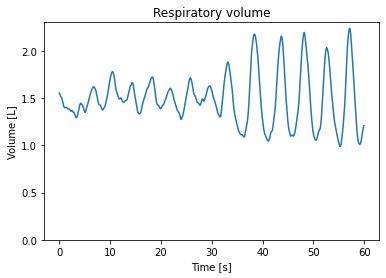

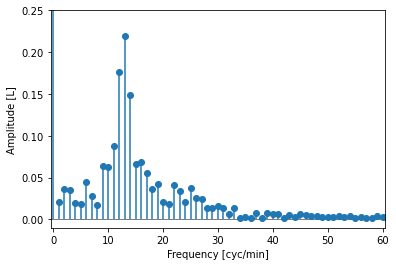

In [90]:
x, y = respiration['Time [s]'], respiration['Volume [L]']

n = len(x) # 600 samples
L = 1 # signal length = 60 seconds
ts = L / n

freq, spect = obtain_frequency_spectrum(y, ts)

plt.plot(x, y)
plt.title('Respiratory volume')
plt.ylabel('Volume [L]')
plt.xlabel('Time [s]')
plt.ylim([0, 2.3])
plt.show()

plt.axhline(0.0, color='k', lw=0.5)
plt.stem(freq, spect, basefmt='None')
plt.ylabel('Amplitude [L]')
plt.xlabel('Frequency [cyc/min]')
plt.xlim([-0.5, 60.5])
plt.ylim([-0.01, 0.25])
plt.show()

In [110]:
dominant_freq = spect[1:-1].argmax() + 1
print('Most dominant frequency is at {} cycles/minute'.format(dominant_freq))

nyquist_freq = n / 2 * L
print('Nyquist frequency is at {} cycles/minute'.format(nyquist_freq))

Most dominant frequency is at 13 cycles/minute
Nyquist frequency is at 300.0 cycles/minute


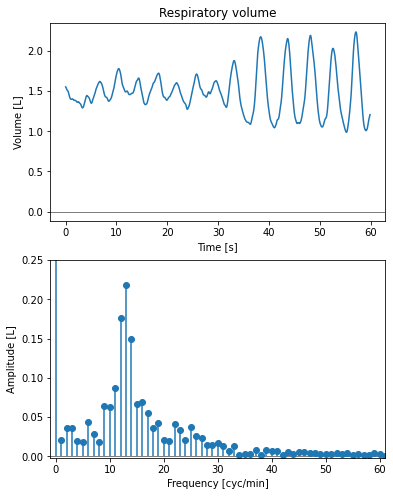

f_Ny = n/2L = 300.000 cyc/min
f_max (f>0) =  13.000 cyc/min


### Exercise 4

The following code loads information regarding the water level as measured at 10-minute intervals in Lauwersoog (Groningen, NL) over the past 4 weeks (from: [Rijkswaterstaat](https://rijkswaterstaatdata.nl)).

```python
url = 'https://waterinfo.rws.nl/api/Download/CSV?expertParameter=' + \
      'Waterhoogte%20Oppervlaktewater%20t.o.v.%20Normaal%20Amsterdams%20Peil%20in%20cm' + \
      '&locationSlug=Lauwersoog(LAUW)&timehorizon=-672,0'
tides = pd.read_csv(url, sep=';', header=0, usecols=[0, 1, 4],
                    names=['Date', 'Time', 'Water level [cm NAP]']).dropna()
```

From these data, estimate the period of the tide in Lauwersoog.

In [125]:
url = 'https://waterinfo.rws.nl/api/Download/CSV?expertParameter=' + \
      'Waterhoogte%20Oppervlaktewater%20t.o.v.%20Normaal%20Amsterdams%20Peil%20in%20cm' + \
      '&locationSlug=Lauwersoog(LAUW)&timehorizon=-672,0'
tides = pd.read_csv(url, sep=';', header=0, usecols=[0, 1, 4],
                    names=['Date', 'Time', 'Water level [cm NAP]']).dropna()

tides = tides.astype({'Date': 'datetime64[ns]'})

In [156]:
tides.iloc[0:68]['Water level [cm NAP]'].max()

82.0

In [155]:
tides.iloc[68:212]['Water level [cm NAP]'].max()

100.0

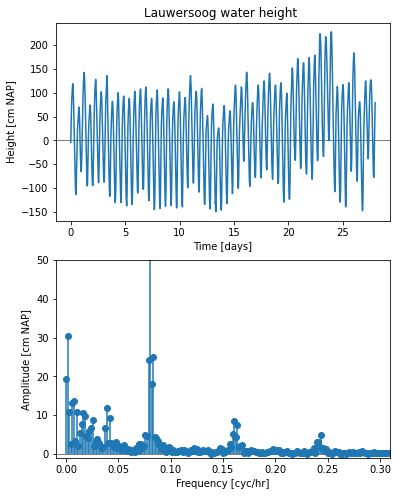

T = 1/f_max = 12.441 hrs/cyc


### Exercise 5

Previously, it was shown that a Fourier series of sines with amplitudes $b_i = \frac{1}{f_i}$ (for $f_i>0$; and all $a_i=0$) converges to a sawtooth wave.

Investigate and describe the shape of the signal that emerges from the following series:

1. $b_i = \frac{1}{f_i}$ for all odd $i$

2. $a_i = \frac{1}{f_i^2}$ for all odd $i$

3. $b_i = \frac{(-1)^i}{f_i}$ for all positive $i$

4. $b_i = \frac{f_i}{f_i^2-\frac{1}{4}}$ for all positive $i$

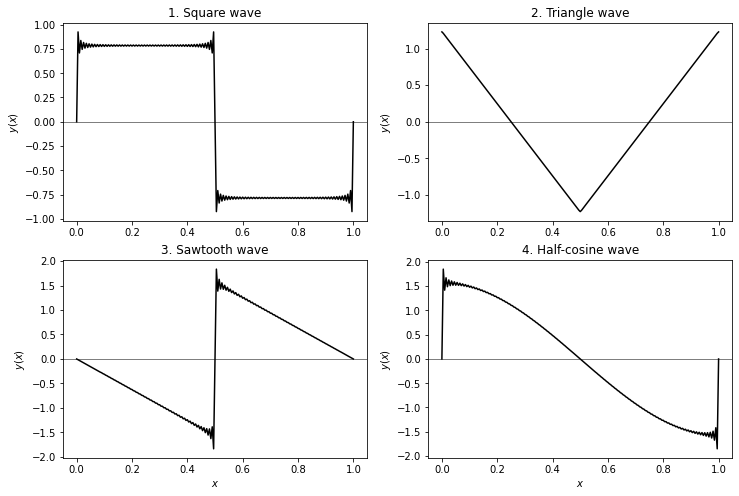

### <a id="/9">Lesson 4 - Discrete Fourier transform</a>

* <span style="color:#336699"><a href="#/1">Part 3A</a><br />Introduction</span>

* <u>Part 3B</u><br />*Trigonometric regression*

* <span style="color:#336699"><a href="#/13">Part 3C</a><br />Fourier series</span>

* <span style="color:#336699"><a href="#/17">Part 3D</a><br />Discrete cosine transform</span>

### Trigonometric regression

The prototypical periodic function is a sinusoid

$$
y(x) = Y + A \cdot \cos \left( 2 \pi f x - \varphi \right)
$$

that is characterized by

* a [frequency](https://en.wikipedia.org/wiki/Frequency) $f$

* an [amplitude](https://en.wikipedia.org/wiki/Amplitude) $A$

* a horizontal [phase](https://en.wikipedia.org/wiki/Phase_(waves)) shift $\varphi$

For convenience, we also include

* a vertical shift or [bias](https://en.wikipedia.org/wiki/DC_bias) $Y$

<small>**Note:** here, we measure phase relative to a cosine, such that a sine wave has $\varphi=90$°; other conventions exist.</small>

![Wave characteristics](https://uploads-cdn.omnicalculator.com/images/phase-shift/phase-shift-explanation.png)

Using the trigonometric identity $\cos(\alpha-\beta)=\cos(\alpha)\cos(\beta)+\sin(\alpha)\sin(\beta)$, this can be reformulated as a linear regression model equation with three coefficients $a_i$:

$$
\begin{aligned}
y(x) &= Y + A\cos(\varphi) \cdot \cos \left( 2 \pi f x \right) + A\sin(\varphi) \cdot \sin \left( 2 \pi f x \right)
\\
     &= a_0 + a_1 \cdot \cos(2 \pi f x) + a_2 \cdot \sin(2 \pi f x)
\end{aligned}
$$

<small>**Note:** the coefficient $a_2$ corresponds with $b_1$ from the Fourier series.</small>

In the reverse direction, for known $a_1 = A\cos(\varphi)$ and $a_2 = A\sin(\varphi)$, the amplitude and phase can be computed as $A = \sqrt{a_1^2+a_2^2}$ and $\varphi = \arctan \left( \frac{a_2}{a_1} \right)$. This is the basis for the [Pythagorean](https://en.wikipedia.org/wiki/Pythagorean_theorem) formula for the amplitude spectrum.
 
<small>**Note:** the return value of the [arctangent](https://www.wikiwand.com/en/Atan2) ranges from $-\frac{\pi}{2}$ to $+\frac{\pi}{2}$; depending on the quadrant $a$ and $b$ fall in, an extra $\pi$ may need to be added (use `np.arctan2(b, a)` to automate that).</small>

<img src="https://h30434.www3.hp.com/legacyfs/online/20679i2A9B4DC3BEB059F5/image-size/original?v=mpbl-1&px=-1%22" width="10%" height="10%" alt="Quadrants" />

In matrix form, the model can be expressed as

$$
\left[\begin{array}{c}
y_1\\
y_2\\
\vdots\\
y_n
\end{array}\right]=\left[\begin{array}{ccc}
1 & \cos(2 \pi f x_1) & \sin(2 \pi f x_1) \\
1 & \cos(2 \pi f x_2) & \sin(2 \pi f x_2) \\
\vdots & \vdots & \vdots \\
1 & \cos(2 \pi f x_n) & \sin(2 \pi f x_n)
\end{array}\right]\left[\begin{array}{c}
a_0\\
a_1\\
a_2
\end{array}\right] + \left[\begin{array}{c}
e_0\\
e_1\\
\vdots\\
e_n
\end{array}\right]
$$

where $e_i$ are the residuals. In shorthand notation this equation becomes $\boldsymbol{y} = \boldsymbol{X} \boldsymbol{a} + \boldsymbol{e}$, where $\boldsymbol{X}$ is the [design matrix](https://en.wikipedia.org/wiki/Design_matrix).

Following the exact same least-squares approach as in lesson 3, the general solution equals $\boldsymbol{a} = (\boldsymbol{X}^\text{T}\boldsymbol{X})^{-1} \cdot (\boldsymbol{X}^\text{T} \boldsymbol{y}) = \boldsymbol{M}^{-1}\boldsymbol{v}$. This allows the constant bias $a_0$ as well as the cosine and sine coefficients $a_1$ and $a_2$ to be calculated, and from that the amplitude $A$ and phase $\varphi$ to be derived.

### Example

We wish to find the sinusoid

$$
y(x) = Y + A \cos\left(\frac{1}{6}\pi x - \varphi \right)
$$

with frequency $f=\frac{1}{12}$ that best passes through the points $(0,3)$, $(2,3)$, $(4,-1)$, $(6,-1)$, and $(10,-5)$.
 
<small>**Note:** in contrast with the discrete Fourier transform, we do not assume the samples to be equidistant in ordinary least-squares regression.</small>

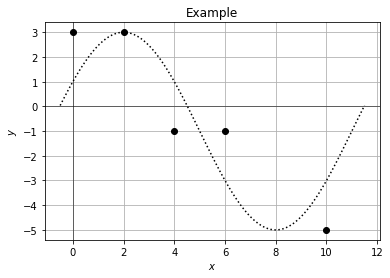

Figure 8: Example


In [25]:
figure(8)

The design matrix equals

$$
\boldsymbol{X} = \left[\begin{array}{ccc}
1 & \cos\left(2\pi\frac{0}{12} \right) & \sin\left(2\pi\frac{0}{12} \right) \\
1 & \cos\left(2\pi\frac{2}{12} \right) & \sin\left(2\pi\frac{2}{12} \right) \\
1 & \cos\left(2\pi\frac{4}{12} \right) & \sin\left(2\pi\frac{4}{12} \right) \\
1 & \cos\left(2\pi\frac{6}{12} \right) & \sin\left(2\pi\frac{6}{12} \right) \\
1 & \cos\left(2\pi\frac{10}{12} \right) & \sin\left(2\pi\frac{10}{12} \right) \\
\end{array}\right] = \left[\begin{array}{ccc}
1 & 1 & 0 \\
1 & \frac{1}{2} & \frac{1}{2}\sqrt{3} \\
1 & -\frac{1}{2} & \frac{1}{2}\sqrt{3} \\
1 & -1 & 0 \\
1 & \frac{1}{2} & -\frac{1}{2}\sqrt{3}
\end{array}\right]
$$

such that

$$
\boldsymbol{M} = \boldsymbol{X}^\text{T} \boldsymbol{X} = \left[\begin{array}{ccc}
5 & \frac{1}{2} & \frac{1}{2}\sqrt{3} \\
\frac{1}{2} & \frac{11}{4} & -\frac{1}{4}\sqrt{3} \\
\frac{1}{2}\sqrt{3} & -\frac{1}{4}\sqrt{3} & \frac{9}{4}
\end{array}\right]
\quad\text{and}\quad
\boldsymbol{v} = \boldsymbol{X}^\text{T} \boldsymbol{y} = \left[\begin{array}{c}
-1 \\
\frac{7}{2} \\
\frac{7}{2}\sqrt{3}
\end{array}\right]
$$

In [34]:
def cos_lin(f, x):
    return np.cos(2*np.pi*f*x)

def sin_lin(f, x):
    return np.sin(2*np.pi*f*x)

f = 1/12
    
xi = np.array([0, 2, 4, 6, 10])
yi = np.array([3, 3, -1, -1, -5])

X = np.vstack((np.ones(xi.size), cos_lin(f, xi), sin_lin(f, xi))).T
M = X.T @ X
v = X.T @ yi

We then need to solve $\boldsymbol{M} \boldsymbol{a} = \boldsymbol{v}$. For instance, using Gaussian elimination,

$$
\left[\begin{array}{ccc|c}
5 & \frac{1}{2} & \frac{1}{2}\sqrt{3} & -1 \\
\frac{1}{2} & \frac{11}{4} & -\frac{1}{4}\sqrt{3} & \frac{7}{2} \\
\frac{1}{2}\sqrt{3} & -\frac{1}{4}\sqrt{3} & \frac{9}{4} & \frac{7}{2}\sqrt{3}
\end{array}\right] \sim \left[\begin{array}{ccc|c}
10 & 1 & \sqrt{3} & -2 \\
2 & 11 & -\sqrt{3} & 14 \\
2 & -1 & 3\sqrt{3} & 14
\end{array}\right] \sim \left[\begin{array}{ccc|c}
1 & 0 & 0 & -1\\
0 & 1 & 0 & 2\\
0 & 0 & 1 & 2\sqrt{3}
\end{array}\right]
$$

Therefore, $a_0 = -1$, $a_1 = 2$, $a_2 = 2\sqrt{3}$, and the trigonometric curve fit equals

$$
y(x) = -1 + 2\cos\left(\frac{1}{6}\pi x\right) + 2\sqrt{3} \sin\left(\frac{1}{6}\pi x\right)
$$

This can also be expressed using an amplitude $A=\sqrt{2^2+\left(2\sqrt{3}\right)^2}=4$ and phase $\varphi=\arctan\left( \frac{2\sqrt{3}}{2} \right)=\frac{\pi}{3}$ as

$$
y(x) = -1 + 4 \cos\left(\frac{1}{6}\pi x - \frac{\pi}{3} \right)
$$

In [40]:
a = np.linalg.solve(M, v)

a0 = a[0]
a1 = a[1]
a2 = a[2]

A = np.sqrt(a1**2 + a2**2)
phi = np.arctan2(a2, a1)

print('Y: {}'.format(a0))
print('A: {}'.format(A))
print('phi: {}'.format(phi))

x = 2
y = a0 + A * np.cos(1/6*np.pi*x - phi)

print('y({}) = {}'.format(x, y))

Y: -0.9999999999999994
A: 3.999999999999999
phi: 1.0471975511965974
y(2) = 2.9999999999999996


### Exercise 6

Determine the value $y(x)$ at $x=0$ of the sinusoid with frequency $f=\frac{1}{2}$ that best passes through the points $(0,1)$, $(\frac{1}{2},3)$, $(1,-1)$, $(1\frac{1}{2},1)$, and $(2,2)$.

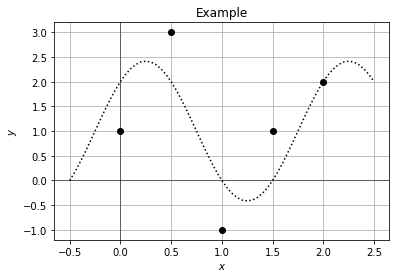

Figure 9: Example


In [26]:
figure(9)

$y$ = $1 + cos(1/6\pi x - 0.7854)$

$y(0)$ = $1.7071$

### Exercise 7

Complete the below skeleton function `trig_curvefit()` that interpolates between a number of given data points that are specified in arrays `xi` and `yi` using trigonometric curve fitting, and calculates the $y$-values that correspond with all the $x$-values that are requested. The user supplies the desired `period` of the sinusoid as a required argument.

```python
def trig_curvefit(xi, yi, x, period):
    """y = trig_curvefit(xi, yi, x, period).
    Trigonometric curve fitting method that fits a sinusoid
    with a given period through data points {xi,yi},
    evaluated at arguments x.
    xi     = {x1,x2,...,xn}
    yi     = {y1,y2,...,xn}
    x      = arguments x
    period = sinusoidal period
    """
    if xi.size != yi.size:
        raise ValueError('xi and yi must have the same length')
    pass   # ADD YOUR OWN CODE HERE
    return y
```

In [86]:
def trig_curvefit(xi, yi, x, period):
    """y = trig_curvefit(xi, yi, x, period).
    Trigonometric curve fitting method that fits a sinusoid
    with a given period through data points {xi,yi},
    evaluated at arguments x.
    xi     = {x1,x2,...,xn}
    yi     = {y1,y2,...,xn}
    x      = arguments x
    period = sinusoidal period
    """
    if xi.size != yi.size:
        raise ValueError('xi and yi must have the same length')
        
    f = period
    
    # turn to float64
    xi + 0.0
    yi + 0.0
    
    def cos_lin(f, x):
        return np.cos(2*np.pi*f*x)

    def sin_lin(f, x):
        return np.sin(2*np.pi*f*x)

    X = np.vstack((np.ones(xi.size), cos_lin(f, xi), sin_lin(f, xi))).T
    M = X.T @ X
    v = X.T @ yi
    
    a = np.linalg.solve(M, v)

    a0 = a[0]
    a1 = a[1]
    a2 = a[2]

    A = np.sqrt(a1**2 + a2**2)
    phi = np.arctan2(a2, a1)

    y = a0 + A * np.cos(2*np.pi*f*x - phi)
    
    return y

### Exercise 8

Apply your own function `trig_curvefit()` to fit and plot a single pure sinusoid through the temperature data for the city of Groningen from the example in Part 4A.

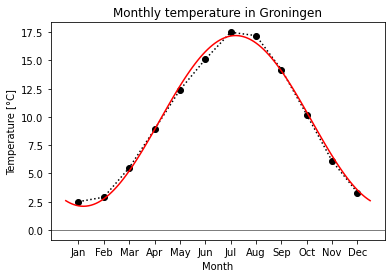

In [113]:
from calendar import month_abbr
months = [month_abbr[i + 1] for i in range(12)]
temps = np.array([2.5,  2.9,  5.5,  8.9,  12.4, 15.1,
                  17.5, 17.2, 14.2, 10.2, 6.1,  3.3])

xi = np.arange(12)
yi = temps

x = np.linspace(-0.5, 11.5, 121)

# one cycle is 12, thus f = 1/12
f = 1/12

y = trig_curvefit(xi, yi, x, f)


plt.axhline(0.0, color='k', lw=0.5)
plt.plot(temps, 'o:k')
plt.plot(x, y, '-', color='red')
plt.xlabel('Month'); plt.ylabel('Temperature [°C]')
plt.title('Monthly temperature in Groningen')
plt.xticks(range(12), months)
plt.show()

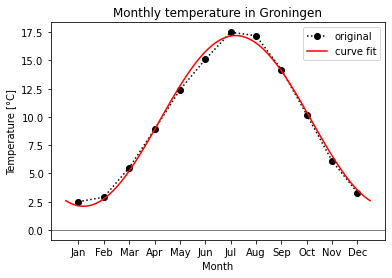

### Exercise 9

The following code fragment extracts information from the Narragansett Bay long-term plankton time series that includes measurements of chlorophyl concentrations in the [Narragansett Bay](https://en.wikipedia.org/wiki/Narragansett_Bay) from the year 2020 (from: [University of Rhode Island](https://web.uri.edu/gso/research/plankton/data/)).

```python
url = 'https://web.uri.edu/gso/files/chldata_10.13.2021.xls'
chloro = pd.read_excel(url, skiprows=1027, nrows=52,
                       usecols = [12, 13], names=['Date', 'Chlorophyl [μg/L]'])
```

Plot these data together with a sinusoidal trend line that shows the yearly fluctuations in chlorophyl concentrations.

<small>**Note:** the `Series.dt.day_of_year` property from `pandas` may prove useful.</small>

In [102]:
url = 'https://web.uri.edu/gso/files/chldata_10.13.2021.xls'
chloro = pd.read_excel(url, skiprows=1027, nrows=52,
                       usecols = [12, 13], names=['Date', 'Chlorophyl [μg/L]'])
chloro.head()

,Date,Chlorophyl [μg/L]
0,2020-01-06,1.668235
1,2020-01-13,2.017909
2,2020-01-20,1.219002
3,2020-01-27,3.066930
4,2020-02-04,6.029444


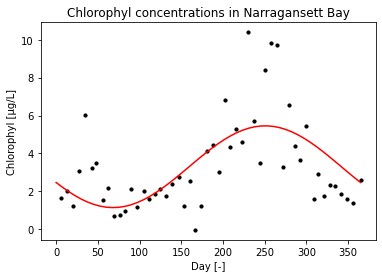

In [116]:
xi = chloro['Date'].dt.day_of_year
yi = chloro['Chlorophyl [μg/L]']

f = 1/365

x = np.linspace(0, 365)
y = trig_curvefit(xi, yi, x, f)

plt.scatter(xi, yi, color='black', s=10)
plt.plot(x, y, '-', color='red')

plt.title('Chlorophyl concentrations in Narragansett Bay')
plt.xlabel('Day [-]')
plt.ylabel('Chlorophyl [μg/L]')

plt.show()

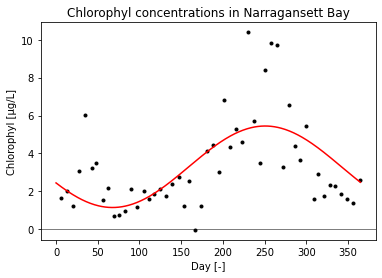

### <a id="/13">Lesson 4 - Discrete Fourier transform</a>

* <span style="color:#336699"><a href="#/1">Part 3A</a><br />Introduction</span>

* <span style="color:#336699"><a href="#/9">Part 3B</a><br />Trigonometric regression</span>

* <u>Part 3C</u><br />*Fourier series*

* <span style="color:#336699"><a href="#/17">Part 3D</a><br />Discrete cosine transform</span>

### Fourier series

The trigonometric regression model can straightforwardly be extended to include *all* sinusoidal components.

$$
\begin{aligned}
y(x) = a_0 &+ a_1 \cos \left( 2 \pi \frac{x}{L} \right) + b_1 \sin \left( 2 \pi \frac{x}{L} \right) +
\\
           &+ a_2 \cos \left( 2 \pi \frac{2x}{L} \right) + b_2 \sin \left( 2 \pi \frac{2x}{L} \right) + \ldots +
\\
           &+ a_m \cos \left( 2 \pi \frac{mx}{L} \right) \left[ + b_m \sin \left( 2 \pi \frac{mx}{L} \right) \right]
\end{aligned}
$$

The frequencies of the components should not exceed the Nyquist frequency $f_\text{Ny} = \frac{n}{2L}$. Two cases can be distinguished:

* if the number of samples $n$ is odd, then the highest term has $m = \frac{n-1}{2}$ and includes both the cosine term and the [bracketed] sine term

* if the number of samples $n$ is even, then the highest cosine term has $m = \frac{n}{2}$, but the [bracketed] sine term is not included

Again, this can concisely be expressed in matrix form $\boldsymbol{y} = \boldsymbol{X} \boldsymbol{a} + \boldsymbol{e}$

$$
\left[\begin{array}{c}
y_1\\
y_2\\
\vdots\\
y_n
\end{array}\right]=\left[\begin{array}{cccccc}
1 & \cos\left(2\pi\frac{x_1}{L}\right) & \sin\left(2\pi\frac{x_1}{L}\right) & \cdots & \cos\left(2\pi\frac{mx_1}{L}\right) & \sin\left(2\pi\frac{mx_1}{L}\right) \\
1 & \cos\left(2\pi\frac{x_2}{L}\right) & \sin\left(2\pi\frac{x_2}{L}\right) & \cdots & \cos\left(2\pi\frac{mx_2}{L}\right) & \sin\left(2\pi\frac{mx_2}{L}\right) \\
\vdots & \vdots & \vdots \\
1 & \cos\left(2\pi\frac{x_n}{L}\right) & \sin\left(2\pi\frac{x_n}{L}\right) & \cdots & \cos\left(2\pi\frac{mx_n}{L}\right) & \sin\left(2\pi\frac{mx_n}{L}\right)
\end{array}\right]\left[\begin{array}{c}
a_0\\
a_1\\
b_1\\
\vdots\\
a_m\\
b_m
\end{array}\right] + \left[\begin{array}{c}
e_0\\
e_1\\
\vdots\\
e_n
\end{array}\right]
$$

The last column of the design matrix $\boldsymbol{X}$ and the last coefficient $b_m$ in the coefficient vector $\boldsymbol{a}$ will be missing if $n$ is odd.

Reordering the columns of the design matrix and the elements of the coefficient vector to group the cosine and sine parts together, this is equivalent to

$$
\left[\begin{array}{c}
y_1\\
y_2\\
\vdots\\
y_n
\end{array}\right]=\left[\begin{array}{ccccccc}
1 & \cos\left(2\pi\frac{x_1}{L}\right) & \cdots & \cos\left(2\pi\frac{mx_1}{L}\right) & \sin\left(2\pi\frac{x_1}{L}\right) & \cdots & \sin\left(2\pi\frac{mx_1}{L}\right) \\
1 & \cos\left(2\pi\frac{x_2}{L}\right) & \cdots & \cos\left(2\pi\frac{mx_2}{L}\right) & \sin\left(2\pi\frac{x_2}{L}\right) & \cdots & \sin\left(2\pi\frac{mx_2}{L}\right) \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
1 & \cos\left(2\pi\frac{x_n}{L}\right) & \cdots & \cos\left(2\pi\frac{mx_n}{L}\right) & \sin\left(2\pi\frac{x_n}{L}\right) & \cdots & \sin\left(2\pi\frac{mx_n}{L}\right)
\end{array}\right]\left[\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_m\\
b_1\\
\vdots\\
b_m
\end{array}\right] + \left[\begin{array}{c}
e_0\\
e_1\\
\vdots\\
e_n
\end{array}\right]
$$

If the data are regularly sampled at equal intervals $t_s$ across an entire period of the signal, then $x_i$ can be expressed as $x_i = i \cdot t_s = \frac{i}{n} \cdot L$. Making this substitution, the design matrix $\boldsymbol{X}$ can be written as

$$
\begin{aligned}
\boldsymbol{X} &= \left[\begin{array}{cc}
\boldsymbol{C} & \boldsymbol{S}
\end{array}\right] =
\\
&= \left[\begin{array}{ccc}
\cos(0) & \cos\left(2\pi\frac{0}{n}\right) & \cdots & \cos\left(2\pi\frac{0}{n}\right) & \sin\left(2\pi\frac{0}{n}\right) & \cdots & \sin\left(2\pi\frac{0}{n}\right) \\
\cos(0) & \cos\left(2\pi\frac{1}{n}\right) & \cdots & \cos\left(2\pi\frac{m}{n}\right) & \sin\left(2\pi\frac{1}{n}\right) & \cdots & \sin\left(2\pi\frac{m}{n}\right) \\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
\cos(0) & \cos\left(2\pi\frac{n-1}{n}\right) & \cdots & \cos\left(2\pi\frac{m(n-1)}{n}\right) & \sin\left(2\pi\frac{n-1}{n}\right) & \cdots & \sin\left(2\pi\frac{m(n-1)}{n}\right)
\end{array}\right]
\end{aligned}
$$

where $\boldsymbol{C}$ and $\boldsymbol{S}$ contain the cosine and sine elements, respectively.

The general form of the elements therefore is $C_{ij} = \cos\left(2\pi\frac{ij}{n}\right)$ and $S_{ij} = \sin\left(2\pi\frac{ij}{n}\right)$.

<small>**Note:** as is the custom in the theory of the discrete Fourier transform, we let the row indices $i$ run from 0 to $n-1$ instead of from 1 to $n$; the column indices $j$ run from 0 to $m$ for $\boldsymbol{C}$, and from 1 to $m$ (for odd $n$) or from 1 to $m-1$ (for even $n$) for $\boldsymbol{S}$.</small>

The figure illustrates the contents of the cosine part $\boldsymbol{C}$ and the sine part $\boldsymbol{S}$ that together form the design matrix $\boldsymbol{X}$. The columns contain sinusoids that increase in frequency from left to right.

In the example shown, $n=12$ is even, and the last column of $\boldsymbol{C}$ corresponds with the Nyquist frequency (for odd $n$, this column would not be included). The first column of $\boldsymbol{C}$ always corresponds with the $f=0$ component that models a constant bias.

$\boldsymbol{S}$ does not contain any column for the frequencies $f=0$ or $f=f_\text{Ny}$, since that would contain only zeroes.

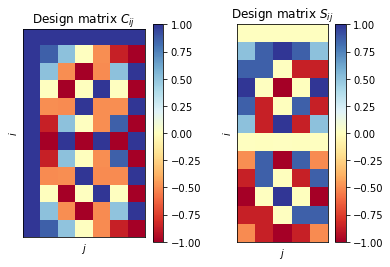

Figure 10: Design matrix X = [C,S]


In [30]:
figure(10)

### Fourier transformation

Interestingly, when solving for the coefficients $\boldsymbol{a} = (\boldsymbol{X}^\text{T}\boldsymbol{X})^{-1} \cdot (\boldsymbol{X}^\text{T} \boldsymbol{y}) = \boldsymbol{M}^{-1}\boldsymbol{v}$, the symmetric [Gram matrix](https://en.wikipedia.org/wiki/Gram_matrix) $\boldsymbol{M} = \boldsymbol{X}^\text{T}\boldsymbol{X}$ turns out to take on a diagonal form. It equals

$$
\boldsymbol{M} = \left[\begin{array}{ccc}
n & 0 & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
0 & \frac{n}{2} & 0 & & & & & \vdots \\
0 & 0 & \ddots & & & & & \vdots \\
\vdots & & & \frac{n}{2} & 0 & & & \vdots \\
\vdots & & & 0 & n & 0 & & \vdots \\
\vdots & & & & 0 & \frac{n}{2} & & \vdots \\
\vdots & & & & & & \ddots & \vdots \\
0 & \cdots & \cdots & \cdots & \cdots & 0 & 0 & \frac{n}{2}
\end{array}\right]
$$

As a result, the matrix inverse takes the simple diagonal form

$$
\boldsymbol{M}^{-1} = \frac{1}{n} \left[\begin{array}{ccc}
1 & 0 & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
0 & 2 & 0 & & & & & \vdots \\
0 & 0 & \ddots & & & & & \vdots \\
\vdots & & & 2 & 0 & & & \vdots \\
\vdots & & & 0 & 1 & 0 & & \vdots \\
\vdots & & & & 0 & 2 & & \vdots \\
\vdots & & & & & & \ddots & \vdots \\
0 & \cdots & \cdots & \cdots & \cdots & 0 & 0 & 2
\end{array}\right]
$$

Most diagonal elements are 2. The first 1 occurs in the position that corresponds with the constant bias in the cosine part of the design matrix. The second 1 occurs at the Nyquist frequency in the cosine part (only if $n$ is even).

<small>**Note:** this relates directly to why the Fourier coefficients needed to be multiplied by two, except for those at the zero and Nyquist frequencies.</small>

Now, the coefficients $\boldsymbol{a} = \boldsymbol{M}^{-1}\boldsymbol{v}$ simplify as follows.

If $n$ is odd:

* for the zero frequency:<br />
  $a_0 = \frac{1}{n} \sum_i y_i$

* for $j=1$ to $m$:<br />
  $a_j = \frac{2}{n} \sum_i y_i \cos\left(2\pi\frac{ij}{n}\right)$

* for $j=1$ to $m$:<br />
  $b_j = \frac{2}{n} \sum_i y_i \sin\left(2\pi\frac{ij}{n}\right)$

If $n$ is even:

* for the zero frequency:<br />
  $a_0 = \frac{1}{n} \sum_i y_i$

* for $j=1$ to $m-1$:<br />
  $a_j = \frac{2}{n} \sum_i y_i \cos\left(2\pi\frac{ij}{n}\right)$

* for the Nyquist frequency:<br />
  $a_m = \frac{1}{n} \sum_i y_i$

* for $j=1$ to $m-1$:<br />
  $b_j = \frac{2}{n} \sum_i y_i \sin\left(2\pi\frac{ij}{n}\right)$

The summations are carried out over all samples $i=0$ to $n-1$. These formulas have the advantage that they do not require the explicit construction and inversion of potentially enormous $n \times n$ matrices $\boldsymbol{X}$ and $\boldsymbol{M}$.

### Example

We wish to find the coefficients of the Fourier series that describes the signal defined by the samples $(0,2\frac{1}{2})$, $(1,-2)$, and $(2,1)$.

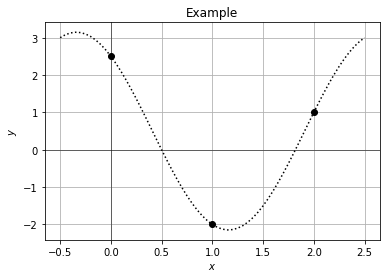

Figure 11: Example


In [31]:
figure(11)

In [26]:
xi = np.array([0, 1, 2])
yi = np.array([2.5, -2, 1])

n = xi.size

# this example uses odd numbers
m = (n - 1) / 2

ii = np.arange(n) # [0, 1, 2]
length = n // 2 + 1 # 2

a, b = np.empty(length), np.empty(length)

# compute zero and Nyquist
a[0] = np.mean(yi)
a[-1] = yi @ np.cos(np.pi*xi)/yi.size

b[0] = 0.0
b[-1] = 0.0

for index in range(1, length + yi.size % 2 - 1):
    print(index)
    

1


The design matrix equals

$$
\boldsymbol{X} = \left[\begin{array}{ccc}
1 & \cos\left(2\pi\frac{0}{3}\right) & \sin\left(2\pi\frac{0}{3}\right) \\
1 & \cos\left(2\pi\frac{1}{3}\right) & \sin\left(2\pi\frac{1}{3}\right) \\
1 & \cos\left(2\pi\frac{2}{3}\right) & \sin\left(2\pi\frac{2}{3}\right)
\end{array}\right] = \left[\begin{array}{ccc}
1 & 1 & 0 \\
1 & -\frac{1}{2} & \frac{1}{2}\sqrt{3} \\
1 & -\frac{1}{2} & -\frac{1}{2}\sqrt{3}
\end{array}\right]
$$

such that

$$
\boldsymbol{M} = \boldsymbol{X}^\text{T}\boldsymbol{X} = \left[\begin{array}{ccc}
3 & 0 & 0 \\
0 & \frac{3}{2} & 0 \\
0 & 0 & \frac{3}{2}
\end{array}\right]
$$

and

$$
\boldsymbol{M}^{-1} = \frac{1}{3} \left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 2
\end{array}\right]
$$

In [ ]:
xi = np.array([])

At the same time

$$
\boldsymbol{v} = \boldsymbol{X}^\text{T}\boldsymbol{y} = \left[\begin{array}{ccc}
1 & 1 & 0 \\
1 & -\frac{1}{2} & \frac{1}{2}\sqrt{3} \\
1 & -\frac{1}{2} & -\frac{1}{2}\sqrt{3}
\end{array}\right]^\text{T}\left[\begin{array}{c}
\frac{5}{2} \\
-2 \\
1
\end{array}\right] = \left[\begin{array}{c}
\frac{3}{2} \\
3 \\
-\frac{3}{2}\sqrt{3}
\end{array}\right]
$$

So the coefficients follow from

$$
\left[\begin{array}{c|c}
\boldsymbol{M} & \boldsymbol{v}
\end{array}\right] = \left[\begin{array}{ccc|c}
3 & 0 & 0 & \frac{3}{2} \\
0 & \frac{3}{2} & 0 & 3 \\
0 & 0 & \frac{3}{2} & -\frac{3}{2}\sqrt{3}
\end{array}\right] \sim \left[\begin{array}{ccc|c}
1 & 0 & 0 & \frac{1}{2} \\
0 & 1 & 0 & 2 \\
0 & 0 & 1 & -\sqrt{3}
\end{array}\right]
$$

Alternatively, we could have used the direct formulas for the coefficient (for $n$ is odd):

* for the zero frequency:<br />
  $a_0 = \frac{1}{n} \sum_i y_i = \frac{1}{3} \cdot \frac{3}{2} = \frac{1}{2}$

* for $j=1$:<br />
  $a_1 = \frac{2}{n} \sum_i y_i \cos\left(2\pi\frac{i}{n}\right) = \frac{2}{3} \cdot 3 = 2$

* for $j=1$:<br />
  $b_1 = \frac{2}{n} \sum_i y_i \sin\left(2\pi\frac{i}{n}\right) = \frac{2}{3} \cdot (-\frac{3}{2}\sqrt{3}) = -\sqrt{3}$

According to either approach, however, the Fourier series amounts to

$$
\begin{aligned}
y(x) &= a_0 + a_1 \cos \left( 2 \pi \frac{x}{L} \right) + b_1 \sin \left( 2 \pi \frac{x}{L} \right)
\\
     &= \frac{1}{2} + 2 \cos\left(2\pi\frac{x}{3}\right) - \sqrt{3} \sin\left(2\pi\frac{x}{3}\right)
\end{aligned}
$$

**NOTE**

The frequencies of the components should not exceed the Nyquist frequency $f_\text{Ny} = \frac{n}{2L}$. Two cases can be distinguished:

* if the number of samples $n$ is odd, then the highest term has $m = \frac{n-1}{2}$ and includes both the cosine term and the [bracketed] sine term

* if the number of samples $n$ is even, then the highest cosine term has $m = \frac{n}{2}$, but the [bracketed] sine term is not included

If $n$ is odd:

* for the zero frequency:<br />
  $a_0 = \frac{1}{n} \sum_i y_i$

* for $j=1$ to $m$:<br />
  $a_j = \frac{2}{n} \sum_i y_i \cos\left(2\pi\frac{ij}{n}\right)$

* for $j=1$ to $m$:<br />
  $b_j = \frac{2}{n} \sum_i y_i \sin\left(2\pi\frac{ij}{n}\right)$

In [13]:
xi = np.array([0, 1, 2])
yi = np.array([2.5, -2, 1])

aj = []
bj = []

n = xi.size
m = int((n-1)/2)

a_0 = 1/n * np.sum(yi)
aj.append(a_0)
bj.append(0)

# a_j
for j in range(m):
    total = 0
    for i in range(xi.size):
        _j = j+1
        total += yi[i] * np.cos(2*np.pi*((i * _j) / n))
    
    coef = 2/n * total
    aj.append(coef)

# b_j
for j in range(m):
    total = 0
    for i in range(xi.size):
        _j = j+1
        total += yi[i] * np.sin(2*np.pi*((i * _j) / n))
    
    coef = 2/n * total
    bj.append(coef)
    
print(aj)
print(bj)

[0.5, 1.9999999999999993]
[0, -1.7320508075688772]


### Exercise 10

Manually determine  the coefficients of the Fourier series that describes the signal defined by the samples $(0,1)$, $(\frac{1}{2},3)$, $(1,-1)$, and $(1\frac{1}{2},1)$.

**NOTE**

The frequencies of the components should not exceed the Nyquist frequency $f_\text{Ny} = \frac{n}{2L}$. Two cases can be distinguished:

* if the number of samples $n$ is odd, then the highest term has $m = \frac{n-1}{2}$ and includes both the cosine term and the [bracketed] sine term

* if the number of samples $n$ is even, then the highest cosine term has $m = \frac{n}{2}$, but the [bracketed] sine term is not included

If $n$ is even:

* for the zero frequency:<br />
  $a_0 = \frac{1}{n} \sum_i y_i$

* for $j=1$ to $m-1$:<br />
  $a_j = \frac{2}{n} \sum_i y_i \cos\left(2\pi\frac{ij}{n}\right)$

* for the Nyquist frequency:<br />
  $a_m = \frac{1}{n} \sum_i y_i$

* for $j=1$ to $m-1$:<br />
  $b_j = \frac{2}{n} \sum_i y_i \sin\left(2\pi\frac{ij}{n}\right)$

In [27]:
xi = np.array([0, 1/2, 1, 3/2])
yi = np.array([1, 3, -1, 1])

aj = []
bj = []

n = xi.size
m = int(n/2)

a_0 = 1/n * np.sum(yi)
aj.append(a_0)
bj.append(0)

# a_j
for j in range(m-1):
    total = 0
    for i in range(xi.size):
        _j = j+1
        total += yi[i] * np.cos(2*np.pi*((i * _j) / n))
    
    coef = 2/n * total
    aj.append(coef)

#nyquist
a_m = 1/n * np.sum(yi)
aj.append(a_m)

# b_j
for j in range(m-1):
    total = 0
    for i in range(xi.size):
        _j = j+1
        total += yi[i] * np.sin(2*np.pi*((i * _j) / n))
    
    coef = 2/n * total
    bj.append(coef)
    
bj.append(0)


print(aj)
print(bj)

[1.0, 0.9999999999999999, 1.0]
[0, 1.0, 0]


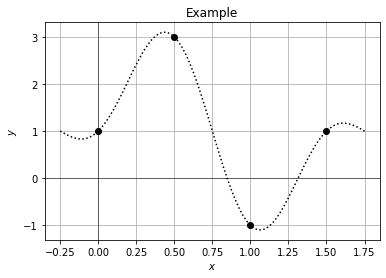

Figure 12: Example


In [32]:
figure(12)

### Exercise 11

Define your own function `fourier_transform()` that, for a given regularly sampled single period of a signal $\boldsymbol{y}$, returns all Fourier coefficients $\boldsymbol{a}$ and $\boldsymbol{b}$. Like for the `rfft()` function, let $b_i=0$ for frequencies equal to zero or the Nyquist frequency.

<small>**Note:** Write your own code that implements the described formulas; do *not* simply wrap one of the `rfft()` functions from `numpy` or `scipy`!</small>

```python
def fourier_transform(yi):
    """a, b = fourier_transform(yi).
    Real-valued Fourier transform that determines the
    coefficients of the Fourier series for a given
    signal y. The coefficients of the cosine terms are
    returned in the array a; those of the sine terms
    in the array b. Frequencies start at zero and do
    not exceed the Nyquist frequency.
    yi     = {y1,y2,...,xn}
    """
    pass   # ADD YOUR OWN CODE HERE
    return a, b
```

### Exercise 12

Check the answers to the previous example and to exercise 10 using your `fourier_transform()` function.

Example:
  y = [ 2.5 -2.   1. ]
  a = [0.5 2. ]
  b = [ 0.         -1.73205081]
Exercise 10:
  y = [ 1.  3. -1.  1.]
  a = [ 1.  1. -1.]
  b = [0. 1. 0.]


### Exercise 13

Determine the spectrum of the respiratory signal in Exercise 3 using both the `rfft()` function and your own `fourier_transform()` function. Check that the answers agree to within numerical precision.

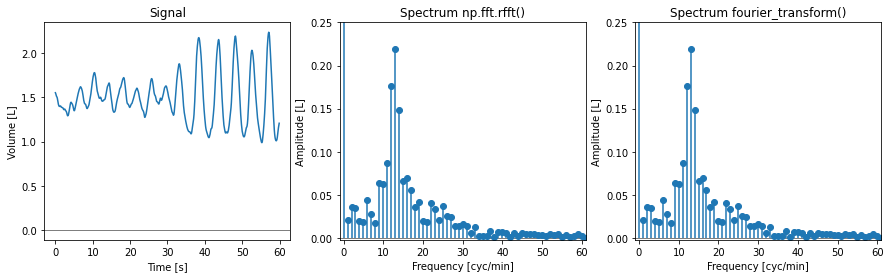

### <a id="/17">Lesson 4 - Discrete Fourier transform</a>

* <span style="color:#336699"><a href="#/1">Part 3A</a><br />Introduction</span>

* <span style="color:#336699"><a href="#/9">Part 3B</a><br />Trigonometric regression</span>

* <span style="color:#336699"><a href="#/13">Part 3C</a><br />Fourier series</span>

* <u>Part 3D</u><br />*Discrete cosine transform*

### Boundary conditions

Because of [Gibb's phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon), the Fourier transform is sensitive to sudden jumps, also when wrapping around the boundaries of the signal.

The figure shows two signals, a continuous one with only an "artificial" jump due the boundary mismatch, and a discontinuous one with a "real" jump in the middle.

Both signals have exactly the same amplitude spectrum.

<small>**Note:** the phases of the frequency components (not shown) are different.</small>

Despite that the left signal, as opposed to the right one, contains no apparent oscillations, the spectrum displays substantial amplitudes at all frequencies.

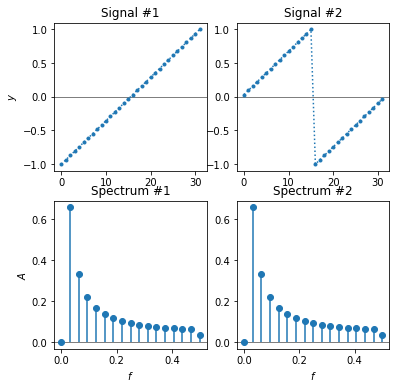

Figure 13: Spectrum #2


In [36]:
figure(13)

Boundaries can be made to match better by appending a reversed copy of the signal to itself. Then the boundaries are continuous by definition.

<small>**Note:** the slope of the signal may still change abruptly.</small>

The resulting spectrum is less influenced by wrap-around and more faithfully represents the variations that are present in the signal.

This additional preprocessing step is the basis of the [discrete cosine transform](https://en.wikipedia.org/wiki/Discrete_cosine_transform), which is widely used in signal analysis and data compression (such as JPEG image, MPEG video, and MP3 sound data).

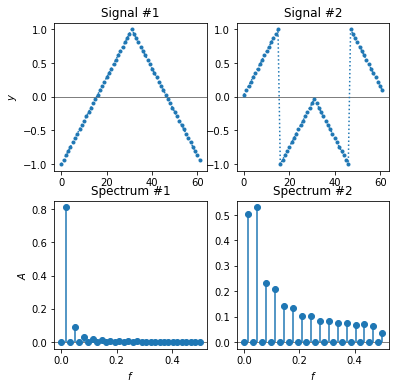

Figure 14: Spectrum #2


In [37]:
figure(14)

### Type-I discrete cosine transform

Slight variations exist in the manner how the signal is appended to itself:

* in Type-I DCT, the first and last points are *not* copied, resulting in $2(n-1)$ samples

* in Type-II DCT, the first and last points *are* copied, resulting in $2n$ samples

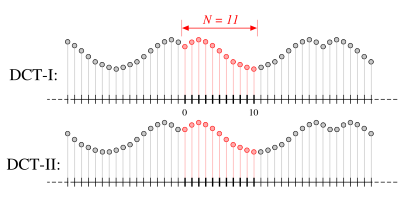

<small>**Note:** type-III and type-IV variants also exist, but these do not impose continuity at both boundaries and are less commonly used.</small>

We will here follow the approach of the Type-I DCT because it leads to a simpler model.

Appending a reversed copy turns the signal into an [even](https://en.wikipedia.org/wiki/Even_and_odd_functions) function: the function becomes symmetric and retains the same shape when reversed.

Because only the cosine terms in a Fourier series are even functions (i.e. $\cos(-x)=\cos(x)$), all $b_i$ turn out to equal zero. In other words, the sine terms can be omitted from the model, explaining the name of the method.

<small>**Note:** the sine function is an *odd* function because it flips sign when reversed (i.e. $\sin(-x)=-\sin(x)$); a [discrete sine transform](https://en.wikipedia.org/wiki/Discrete_sine_transform) also exists but is rarely used.</small>

### Example

On the right we consider a signal that consists of 25 samples in the shape of precisely half a cosine wave (both endpoints included), sampled from $x_0=0$ to $x_{24}=\pi$.

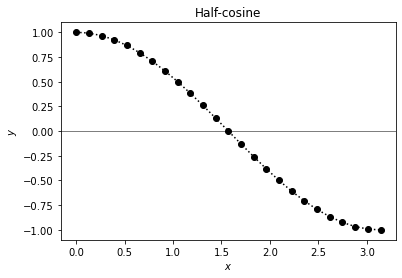

In [2]:
x = np.arange(25) * np.pi / 24.0
y = np.cos(x)

plt.axhline(0.0, color='k', lw=0.5)
plt.plot(x, y, 'o:k')
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.title('Half-cosine')
plt.show()

According to the discrete Fourier transform, the amplitude of the half-cosine has been distributed across various frequency components, a phenomenon called [spectral leakage](https://www.wikiwand.com/en/Spectral_leakage).

<small>**Note:** the sample time equals $t_s=\frac{L}{n}=\frac{\pi}{24}$ because the endpoints were included; the Nyquist-frequency equals $f_\text{Ny}=\frac{1}{2t_s}=\frac{12}{\pi}\approx3.82$.</small>

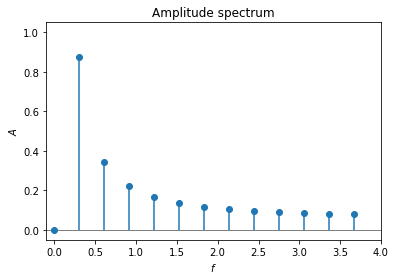

In [3]:
coef = np.fft.rfft(y, norm='forward')
coef[1:] = 2.0 * np.conj(coef[1:])
a, b = np.real(coef), np.imag(coef)
spectrum = np.sqrt(a * a + b * b)
f = np.fft.rfftfreq(y.size, np.pi / 24.0)

plt.axhline(0.0, color='k', lw=0.5)
plt.stem(f, spectrum, basefmt='None')
plt.xlabel('$f$'); plt.ylabel('$A$')
plt.title('Amplitude spectrum')
plt.axis((-0.1, 4.0, -0.05, 1.05))
plt.show()

However, when we extend the signal with a reversed version of itself and do the same, we find a perfectly sharp spectrum.

<small>**Note:** because the sampling time has not changed, the Nyquist frequency has not changed; however, the spacing between frequency components has been reduced.</small>

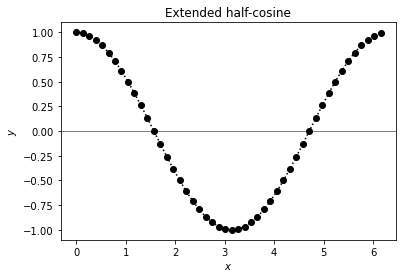

In [5]:
x2 = np.arange(48) * np.pi / 24.0
y2 = np.concatenate((y[:-1], y[:0:-1]))

plt.axhline(0.0, color='k', lw=0.5)
plt.plot(x2, y2, 'o:k')
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.title('Extended half-cosine')
plt.show()

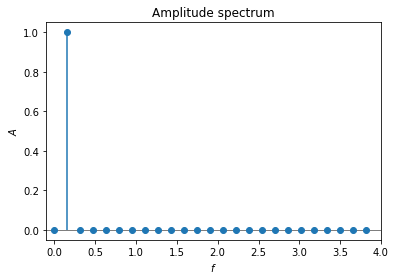

In [6]:
coef2 = np.fft.rfft(y2, norm='forward')
coef2[1:-1] = 2.0 * np.conj(coef2[1:-1])
a2, b2 = np.real(coef2), np.imag(coef2)
spectrum2 = np.sqrt(a2 * a2 + b2 * b2)
f2 = np.fft.rfftfreq(y2.size, np.pi / 24.0)

plt.axhline(0.0, color='k', lw=0.5)
plt.stem(f2, spectrum2, basefmt='None')
plt.xlabel('$f$'); plt.ylabel('$A$')
plt.title('Amplitude spectrum')
plt.axis((-0.1, 4.0, -0.05, 1.05))
plt.show()

The `scipy.fft` module provides the `dct()` function that provides the discrete cosine transform directly. The Type-I discrete cosine transform can be selected by providing a parameter `type=1`. We also again require the `norm='forward'` option.

In [7]:
from scipy.fft import dct
help(dct)

Help on _Function in module scipy.fft._realtransforms:

dct(x, type=2, n=None, axis=-1, norm=None, overwrite_x=False, workers=None)
    Return the Discrete Cosine Transform of arbitrary type sequence x.
    
    Parameters
    ----------
    x : array_like
        The input array.
    type : {1, 2, 3, 4}, optional
        Type of the DCT (see Notes). Default type is 2.
    n : int, optional
        Length of the transform.  If ``n < x.shape[axis]``, `x` is
        truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
        default results in ``n = x.shape[axis]``.
    axis : int, optional
        Axis along which the dct is computed; the default is over the
        last axis (i.e., ``axis=-1``).
    norm : {"backward", "ortho", "forward"}, optional
        Normalization mode (see Notes). Default is "backward".
    overwrite_x : bool, optional
        If True, the contents of `x` can be destroyed; the default is False.
    workers : int, optional
        Maximum number of work

When we apply the `dct()` function to our data, note the following differences with the `fft()` function.

In [30]:
a = dct(y, norm='forward', type=1)
a

array([ 5.44738603e-17,  5.00000000e-01, -3.74974590e-17,  1.17281900e-17,
        1.08526066e-17,  1.03771765e-17,  1.35601754e-17, -6.65097045e-18,
       -4.98675145e-18,  4.19362015e-18,  1.62017871e-17, -2.08166817e-17,
        3.58863838e-18,  2.08166817e-17, -2.31522170e-17, -1.48381352e-18,
        6.07173812e-18,  1.14400848e-17,  7.01812347e-18, -1.51662909e-17,
       -6.83489833e-18,  4.06572048e-18,  2.33775983e-18,  3.70074342e-17,
        8.21456765e-18])

* The function is applied to the original data; we do not need to manually extend the signal.

* The return values are not complex-valued but real-valued; this occurs because the sine components in the imaginary part are absent.

* We can directly assign to the array `a`, because there will be no sine components in array `b`.

* The size of the array that is returned is approximately twice as long as for the `rfft()` function, and now contain the same number of values as the orginal signal.

* Because the (extended) number of samples is always even, the last element always corresponds exactly with the amplitude at the Nyquist frequency.

We do not need to worry about complex conjugation, but we still need to correct for the fact that all components except those at the zero and Nyquist frequencies are a factor 2 too small.

In [31]:
a[1:-1] *= 2.0
a

array([ 5.44738603e-17,  1.00000000e+00, -7.49949181e-17,  2.34563799e-17,
        2.17052133e-17,  2.07543530e-17,  2.71203508e-17, -1.33019409e-17,
       -9.97350289e-18,  8.38724029e-18,  3.24035742e-17, -4.16333634e-17,
        7.17727677e-18,  4.16333634e-17, -4.63044341e-17, -2.96762704e-18,
        1.21434762e-17,  2.28801697e-17,  1.40362469e-17, -3.03325818e-17,
       -1.36697967e-17,  8.13144095e-18,  4.67551967e-18,  7.40148683e-17,
        8.21456765e-18])

The discrete cosine transform does not have an analogous `dctfreq()` to determine the frequencies in the spectrum. However, we can reuse the familiar `rfftfreq()` function, provided that we change the number of samples from $n$ to $2(n-1)$.

In [33]:
def dctfreq(n, d=1.0):
    """Return the Discrete Cosine Transform sample frequencies.
    For information about parameters and return values, please
    consult help(rfftfreq).
    """
    return np.fft.rfftfreq(2 * (n - 1), d)

f = dctfreq(len(x), np.pi / 24.0)
f

array([0.        , 0.15915494, 0.31830989, 0.47746483, 0.63661977,
       0.79577472, 0.95492966, 1.1140846 , 1.27323954, 1.43239449,
       1.59154943, 1.75070437, 1.90985932, 2.06901426, 2.2281692 ,
       2.38732415, 2.54647909, 2.70563403, 2.86478898, 3.02394392,
       3.18309886, 3.3422538 , 3.50140875, 3.66056369, 3.81971863])

Due to the absence of $b_i$, the calculation of the spectrum simplifies to

$$
A_i = \sqrt{a_i^2} = |a_i|
$$

This finally allows us to plot the amplitude spectrum according to the discrete cosine transform, with identical results to our earlier approach.

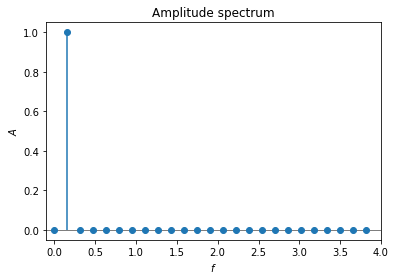

In [11]:
spectrum = np.abs(a)

plt.axhline(0.0, color='k', lw=0.5)
plt.stem(f, spectrum, basefmt='None')
plt.xlabel('$f$'); plt.ylabel('$A$')
plt.title('Amplitude spectrum')
plt.axis((-0.1, 4.0, -0.05, 1.05))
plt.show()

### Exercise 14

Define your own function `cosine_transform()` that, for a given regularly sampled signal $\boldsymbol{y}$, returns all type-I discrete cosine transform coefficients $\boldsymbol{a}$.

<small>**Note:** Write your own code that implements the described formulas; do *not* simply wrap the `dct()` function from `scipy`!</small>

```python
def cosine_transform(yi):
    """a = cosine_transform(yi).
    Type-I discrete cosine transform that determines
    the coefficients of the cosine series for a given
    signal y. The coefficients are returned in the
    array a. Frequencies start at zero and end at the
    Nyquist frequency.
    yi     = {y1,y2,...,xn}
    """
    pass   # ADD YOUR OWN CODE HERE
    return a
```

In [38]:
def cosine_transform(yi):
    coef = np.fft.rfft(yi, norm='forward')
    coef[1:-1] = 2.0 * np.conj(coef[1:-1])
    a = np.real(coef)

    return a

In [39]:
coefs = cosine_transform(y2)

### Exercise 15

Apply your own function `cosine_transform()` to plot the amplitude spectrum of the the previous example involving the half-cosine wave, and verify that your results agree.

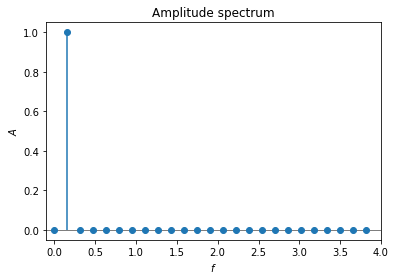

In [40]:
spectrum = np.abs(coefs)

plt.axhline(0.0, color='k', lw=0.5)
plt.stem(f, spectrum, basefmt='None')
plt.xlabel('$f$'); plt.ylabel('$A$')
plt.title('Amplitude spectrum')
plt.axis((-0.1, 4.0, -0.05, 1.05))
plt.show()

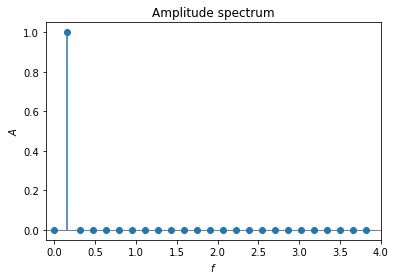

### Exercise 16

I the same fashion as for Exercise 1, generate your own artificial $\frac{1}{2}$-hour long 30-sample signal that is sampled once per minute, containing a single cosine with amplitude $A=1$ and frequencies of either

* $f=4$ cycles/hour

* $f=9$ cycles/hour

* $f=36$ cycles/hour

and plot their amplitude spectra according to the discrete cosine transform.

Again, try to explain your observations.

In [43]:
def obtain_frequency_spectrum(y, sampling_period):
    a = cosine_transform(y)
    f = dctfreq(len(y), sampling_period)
    
    spectrum = np.abs(a)

    
    return f, spectrum

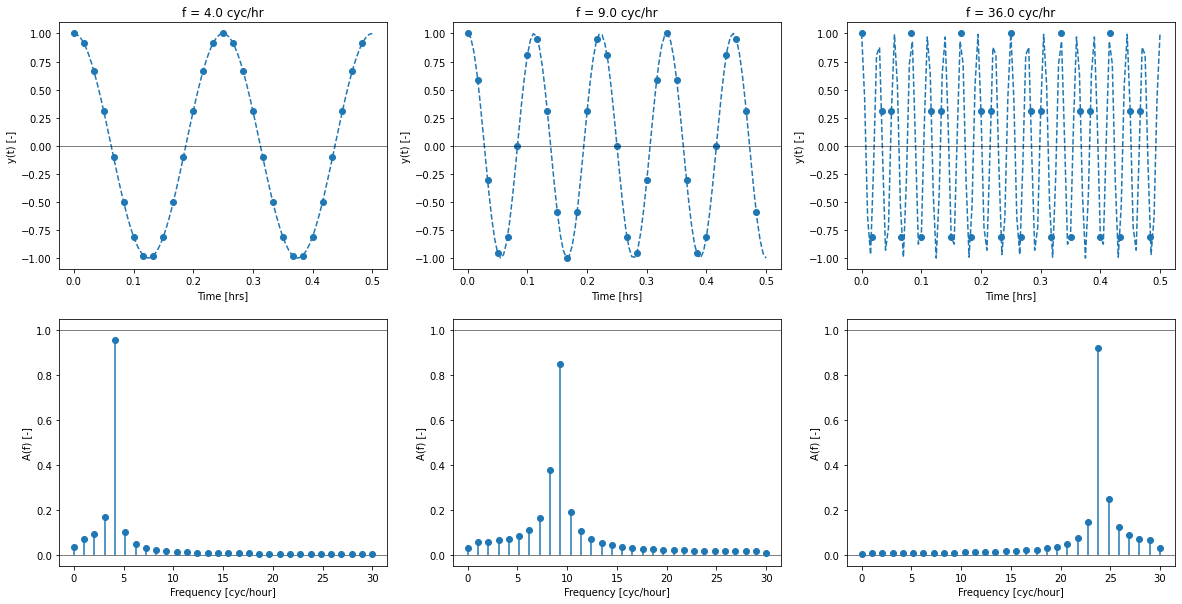

In [47]:
frequencies = [4.0, 9.0, 36.0]

L = 0.5
n = 30
A = 1
ts = L/n # sampling period
fs = 1/ts # sampling frequency

i, j = 0, 0

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for freq in frequencies:
    x, y = generate_wave(freq, n, L, A, 'cos')
    xi, yi = generate_wave(freq, 101, L, A, 'cos', endpoint=True)
    
    axs[i][j].plot(x, y, 'o', color='C0')
    axs[i][j].plot(xi, yi, '--', color='C0')
    
    axs[i][j].axhline(0.0, color='k', lw=0.5)
    axs[i][j].set_ylabel('y(t) [-]')
    axs[i][j].set_xlabel('Time [hrs]')
    axs[i][j].set_title('f = {} cyc/hr'.format(freq))
    
    i += 1
    
    y2 = np.concatenate((y[:-1], y[:0:-1]))
    
    spect = np.abs(cosine_transform(y2))
    freq = dctfreq(len(x), ts)
    
    axs[i][j].axhline(0.0, color='k', lw=0.5)
    axs[i][j].axhline(1.0, color='k', lw=0.5)
    axs[i][j].stem(freq, spect, basefmt='None')
    axs[i][j].set_ylabel('A(f) [-]')
    axs[i][j].set_xlabel('Frequency [cyc/hour]')
    
    
    j += 1
    i = 0

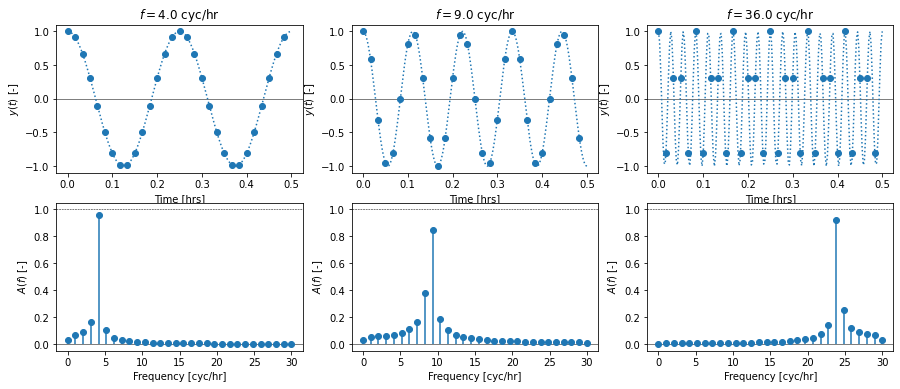

### Exercise 17

Consider the data from exercise 3 in which you determined the *Nyquist frequency* for a discretely measured respiratory signal, as well as the *most dominant positive frequency* that was present in the spectrum.

There is no particular reason to assume that the respiratory phase at the end of the recording matches that at the start. Therefore, the discrete cosine transform may be preferable.

Calculate the discrete cosine transform amplitude spectrum, and again determine the Nyquist frequency and dominant respiratory frequency. Do the answers differ from those according to the discrete Fourier transform? And if so, are the differences substantial?

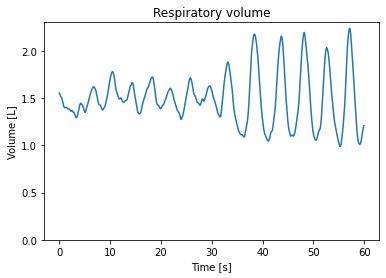

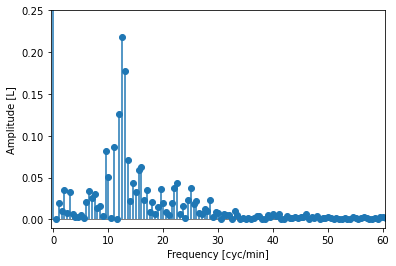

In [54]:
x, y = respiration['Time [s]'], respiration['Volume [L]']
y2 = np.concatenate((y[:-1], y[:0:-1]))

n = len(x) # 600 samples
L = 1 # signal length = 60 seconds
ts = L / n

spect = np.abs(cosine_transform(y2))
freq = dctfreq(len(x), ts)

plt.plot(x, y)
plt.title('Respiratory volume')
plt.ylabel('Volume [L]')
plt.xlabel('Time [s]')
plt.ylim([0, 2.3])
plt.show()

plt.axhline(0.0, color='k', lw=0.5)
plt.stem(freq, spect, basefmt='None')
plt.ylabel('Amplitude [L]')
plt.xlabel('Frequency [cyc/min]')
plt.xlim([-0.5, 60.5])
plt.ylim([-0.01, 0.25])
plt.show()

In [65]:
dominant_freq = spect[1:-1].argmax() + 1
print('Most dominant frequency is at {} cycles/minute'.format(freq[dominant_freq]))

nyquist_freq = n / 2 * L
print('Nyquist frequency is at {} cycles/minute'.format(nyquist_freq))

Most dominant frequency is at 12.520868113522537 cycles/minute
Nyquist frequency is at 300.0 cycles/minute


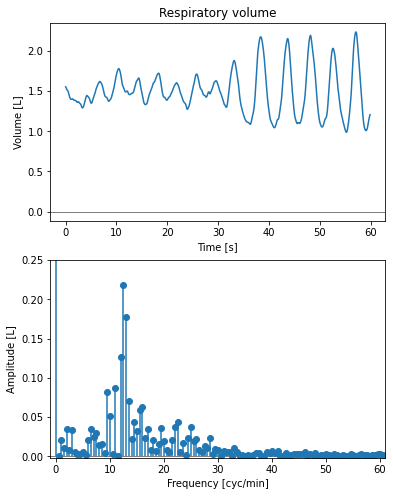

f_Ny = n/2L = 300.000 cyc/min
f_max (f>0) =  12.521 cyc/min


### End of lesson 4

Congratulations for finishing this lesson!

* Run your full notebook from scratch to ensure it works correctly (i.e., `Kernel` > `Restart & Run All`).

* Save your working version (i.e., `File` > `Save and Checkpoint`).

* Submit your completed notebook on [BlackBoard](https://blackboard.hanze.nl).

If handed in on time, you will be provided with feedback on your implementation of the `cosine_transform()` function in **Part 4D**.

***